
NAME:      **BALANITHISH G** and **VISHWAJITH J**

PROJECT:   Oil Spill Impact Prediction on Marine Life using machine learning



In [5]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline



# Load the dataset
colums = ['spill_size','toxicity_level','distance_to_coast','impact']
df = pd.read_csv('updated_oil_spill_data.csv',names=colums)
df.head()
df['spill_size'] = pd.to_numeric(df['spill_size'], errors='coerce') # Use errors='coerce' to handle invalid values
df['toxicity_level'] = pd.to_numeric(df['toxicity_level'], errors='coerce') # Use errors='coerce' to handle invalid values
df['distance_to_coast'] = pd.to_numeric(df['distance_to_coast'], errors='coerce')



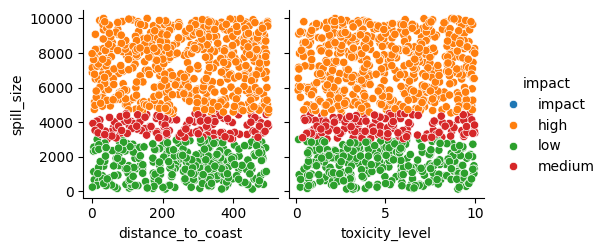

In [8]:
# visualization of data
df.describe()
sns.pairplot(df, x_vars=['distance_to_coast','toxicity_level'], y_vars=['spill_size'], hue='impact')

In [9]:
#separate the input and output
data= df.values
X=data[:,0:3]
Y=data[:,3] # Access the last column using index 3
print(X)
print(Y)

[[nan nan nan]
 [9586.732188925946 2.1033157426942832 229.84925240205067]
 [594.9008115430217 5.127164158204172 370.8717526531468]
 ...
 [706.5513358955731 9.80814572298051 44.12960234841685]
 [5797.430101537139 4.599300365173504 13.17097254670255]
 [4324.765913130264 2.9901660810806425 192.78841191363472]]
['impact' 'high' 'low' ... 'low' 'high' 'medium']


In [10]:
#let train the model
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)
print(X_test.shape)

(201, 3)


In [12]:
# Import the SimpleImputer
from sklearn.impute import SimpleImputer

# Create an imputer to replace NaN with the mean
imputer = SimpleImputer(strategy='mean')  # You can use 'median' or 'most_frequent' as well

# Fit the imputer to your training data and transform it
X_train = imputer.fit_transform(X_train)

# Transform the test data using the trained imputer
X_test = imputer.transform(X_test)

# Now you can train your model
model_svc = SVC()
model_svc.fit(X_train, Y_train)

SVC()

In [16]:
prediction = model_svc.predict(X_test)
#check the prediction accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test,prediction))

0.9850746268656716


In [15]:
#checking the model by giving manual value
test_model = model_svc.predict([[5.3,2.5,4.6]])
print("The Impact level is :{}".format(test_model))

The Impact level is :['low']
